In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.datasets import load_iris
from tabulate import tabulate

In [ ]:
iris = load_iris()
df = iris.data

In [ ]:
n = iris.data.shape[0] 
d = iris.data.shape[1] 
y = 1.0*np.ones([df.shape[0],1])
for i in range(iris.target.shape[0]):
  if iris.target[i]!=1:
    y[i]=-1
indexarr = np.arange(n)
np.random.seed(55)
np.random.shuffle(indexarr) 

In [ ]:
train_data = []
train_label = []
test_data = []
test_label = []
counter = 1
for i in indexarr:
  if counter <= int(0.8*n):
    train_data.append(list(df[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(df[i]))
    test_label.append(list(y[i]))
  counter = counter + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
def predict(w,x):
  if w.T@x > 0:
    return 1
  else:
    return -1

In [ ]:
def compute_accuracy(data,labels,model_w):
  n=data.shape[0]
  c=0
  for i in range(n):
    if predict(model_w,data[i])==labels[i]:
      c+=1
  return c*100/n

$1.$

The appropriate choice of $f_i(w)$ can be:


*   For Hinge Loss:



$$f_i(w)=\frac{λ}{2n}\mathbf{w^Tw} +\frac{1}{n}\text{max}\{0,1-y_i\mathbf{w^T}\mathbf{x}_i\}$$
*   For logistic loss:
$$f_i(w)=\frac{λ}{2n}\mathbf{w^Tw} +\frac{1}{n}\log(1+exp(-y_i\mathbf{w^T}\mathbf{x}_i))$$
* For Squared Hinge Loss:
$$f_i(w)=\frac{λ}{2n}\mathbf{w^Tw} +\frac{1}{n}(\text{max}\{0,1-y_i\mathbf{w^T}\mathbf{x}_i\})^2$$


$2.$

In [ ]:
def compute_loss_h(w,x,y):
  return max(0,1 - w.T@x * y)

$3.$

In [ ]:
def compute_objfuncval(data,labels,model_w):
  n=data.shape[0]
  loss=0
  for i in range(n):
    loss+=compute_loss_h(model_w,data[i],labels[i])/n + 1/(2*n) * lamda * np.linalg.norm(model_w)**2
  return loss

In [ ]:
lamda=0
print(compute_objfuncval(train_data,train_label, np.ones([4,1])))

[10.26333333]


$4.$
The (sub-)gradient is denoted by $g_i(w) = ∇_wf_i(w)$

if $y_iw^Tx_i \geq 1$

then $g_i(w)=\frac{λ}{n}w$

and if $y_iw^Tx_i \leq 1$

then $g_i(w)=\frac{λ}{n}w - y_ix_i$

In [ ]:
def compute_grad_loss_h(x,y,model_w):
  x=np.reshape(x,[4,1])
  model_w=np.reshape(model_w,[4,1])
  if y*np.matmul(model_w.T,x)>1:
    grad=(lamda/n)*model_w
  else:
    grad=((lamda/n)*model_w) - (1/n)*(y*x)
  return grad

$5.$

In [ ]:
print(np.ones([4,1]))

[[1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
def OPT1(data,label,lamda,num_epochs):
  t = 1
  w=np.ones([4,1])
  f_val=[]
  train_acc_list=[]
  test_acc_list=[]
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step=1/t
      w=np.subtract(w , step * compute_grad_loss_h(data[i], label[i], w))
      t = t+1
      if t>10000:
        t=1
    f_val.append(compute_objfuncval(data,label,w))
    test_acc_list.append(compute_accuracy(test_data,test_label,w))
    train_acc_list.append(compute_accuracy(data,label,w))

  return w, f_val, test_acc_list, train_acc_list

$6.$

In [ ]:
number_of_epochs = 1000
lamda_list = [0.001, 0.01, 0.1, 1, 10]
fig, axs = plt.subplots(3, 1, figsize=(9, 30))
axs[0].set_title("Graph of objective function value V/S number of epochs")
axs[1].set_title("Graph of test set accuracy V/S number of epochs")
axs[2].set_title("Graph of train set accuracy V/S number of epochs")

for i, lamda in enumerate(lamda_list):
    result = OPT1(train_data, train_label, lamda, number_of_epochs)
    axs[0].plot(result[1], label="$\lambda = {}$".format(lamda))
    axs[1].plot(result[2], label="$\lambda = {}$".format(lamda))
    axs[2].plot(result[3], label="$\lambda = {}$".format(lamda))

axs[0].legend()
axs[0].set_xlabel("Number of epochs")
axs[0].set_ylabel("Objective function value")
axs[0].grid()

axs[1].legend()
axs[1].set_xlabel("Number of epochs")
axs[1].set_ylabel("Test set accuracy")
axs[1].grid()

axs[2].legend()
axs[2].set_xlabel("Number of epochs")
axs[2].set_ylabel("Train set accuracy")
axs[2].grid()

plt.show()


In [ ]:
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[lamda_list[i],OPT1(train_data,train_label,lamda_list[i],number_of_epochs)[3][-1],OPT1(train_data,train_label,lamda_list[i],number_of_epochs)[2][-1]] for i in range(len(lamda_list))]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            1     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|           10     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+



From the above plots, the training and testing accuracy either increases or it stays same. in the above table we can see that the training and testing accuracy are same for each value of lamda.


$7.$

We are implementing the criteria in which we are stopping when our training accuracy doesn't improve and the algorithm should run for some fixed number of iterations(i have taken 100).

In [ ]:
def compute_loss_h(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w, np.transpose(x)))))


In [ ]:
def compute_objfuncval_h(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_h(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [ ]:
def compute_grad_loss_h(x,y,w,i):
  l = 0
  if np.multiply(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/data.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(y[i], np.transpose(x[i])))/data.shape[0]
  return l

In [ ]:
def OPT2_h(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval = []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 100 or precision == False):
    if epoch > 100:
      a2 = list_of_train_acc[-1] - list_of_train_acc[-10]
      if max(a2, -a2) < 0.00001:
        precision = True
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_h(x,y,w,i))) 
      t = t+1
    if epoch % 10 == 0:
      list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
      list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
      fval.append(compute_objfuncval_h(data,label,w))
    epoch = epoch + 1
  return w, fval, list_of_test_acc, list_of_train_acc

In [ ]:
lambda_set = [10**-3,0.01,0.1,  1, 10]
data = train_data
label = train_label
print("Using Hinge loss function with modified criterion:")
print("____________________________________________________________________________________________")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_h(train_data,train_label,lamda)
  print("\nlambda", lamda)
  print("Test set accuracy", test_set_accuracy_array[-1])
  print("Train set accuracy", train_set_accuracy_array[-1])
  print("=================================================================================================")
  

Using Hinge loss function with modified criterion:
____________________________________________________________________________________________

lambda 0.001
Test set accuracy 53.333333333333336
Train set accuracy 70.0

lambda 0.01
Test set accuracy 46.666666666666664
Train set accuracy 30.0

lambda 0.1
Test set accuracy 53.333333333333336
Train set accuracy 70.0

lambda 1
Test set accuracy 53.333333333333336
Train set accuracy 70.0

lambda 10
Test set accuracy 53.333333333333336
Train set accuracy 70.0


$8.$

For logistic loss with 1000 epochs

In [ ]:
def compute_loss_l(w,x,y):
  return np.log(np.add(1, np.exp(-np.dot(y, np.dot(w, np.transpose(x))))))

In [ ]:
def compute_objfnval_l(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_l(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [ ]:
def compute_grad_loss_l(data, label,w ,i):
  return np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i])))))/np.add(1, np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i]))))))/data.shape[0]

In [ ]:
def OPT1_l(data, label, lamda, epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval = []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  precision = False
  for epoch in range(epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))) 
      t = t+1
    if t>10000:
      t=1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_l(data,label,w))
  return w, fval, list_of_test_acc, list_of_train_acc

In [ ]:
number_of_epochs = 1000
lamda_list = [0.001, 0.01, 0.1, 1, 10]
fig, axs = plt.subplots(3, 1, figsize=(9, 30))
axs[0].set_title("Graph of objective function value V/S number of epochs")
axs[1].set_title("Graph of test set accuracy V/S number of epochs")
axs[2].set_title("Graph of train set accuracy V/S number of epochs")

for i, lamda in enumerate(lamda_list):
    result = OPT1_l(train_data, train_label, lamda, number_of_epochs)
    axs[0].plot(result[1], label="$\lambda = {}$".format(lamda))
    axs[1].plot(result[2], label="$\lambda = {}$".format(lamda))
    axs[2].plot(result[3], label="$\lambda = {}$".format(lamda))

axs[0].legend()
axs[0].set_xlabel("Number of epochs")
axs[0].set_ylabel("Objective function value")
axs[0].grid()

axs[1].legend()
axs[1].set_xlabel("Number of epochs")
axs[1].set_ylabel("Test set accuracy")
axs[1].grid()

axs[2].legend()
axs[2].set_xlabel("Number of epochs")
axs[2].set_ylabel("Train set accuracy")
axs[2].grid()

plt.show()


In [ ]:
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[lamda_list[i],OPT1_l(train_data,train_label,lamda_list[i],number_of_epochs)[3][-1],OPT1_l(train_data,train_label,lamda_list[i],number_of_epochs)[2][-1]] for i in range(len(lamda_list))]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            1     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|           10     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+


For logistic loss with modified stopping criteria

In [ ]:
def OPT2_l(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval= []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 100 or precision == False):
    if epoch > 100:
      a2 = list_of_train_acc[-1] - list_of_train_acc[-10]
      if max(a2, -a2) < 0.00001:
        precision = True
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))) 
      t = t+1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_l(data,label,w))
    epoch = epoch + 1
  return w, fval, list_of_test_acc, list_of_train_acc

In [ ]:
number_of_epochs = 1000
lamda_list = [0.001, 0.01, 0.1, 1, 10]
fig, axs = plt.subplots(3, 1, figsize=(9, 30))
axs[0].set_title("Graph of objective function value V/S number of epochs")
axs[1].set_title("Graph of test set accuracy V/S number of epochs")
axs[2].set_title("Graph of train set accuracy V/S number of epochs")

for i, lamda in enumerate(lamda_list):
    result = OPT1_l(train_data, train_label, lamda, number_of_epochs)
    axs[0].plot(result[1], label="$\lambda = {}$".format(lamda))
    axs[1].plot(result[2], label="$\lambda = {}$".format(lamda))
    axs[2].plot(result[3], label="$\lambda = {}$".format(lamda))

axs[0].legend()
axs[0].set_xlabel("Number of epochs")
axs[0].set_ylabel("Objective function value")
axs[0].grid()

axs[1].legend()
axs[1].set_xlabel("Number of epochs")
axs[1].set_ylabel("Test set accuracy")
axs[1].grid()

axs[2].legend()
axs[2].set_xlabel("Number of epochs")
axs[2].set_ylabel("Train set accuracy")
axs[2].grid()

plt.show()


In [ ]:
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[lamda_list[i],OPT2_l(train_data,train_label,lamda_list[i])[3][-1],OPT2_l(train_data,train_label,lamda_list[i])[2][-1]] for i in range(len(lamda_list))]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            1     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|           10     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+


squared hinge loss with 1000 epochs

In [ ]:
def compute_loss_sh(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w, np.transpose(x)))))**2

In [ ]:
def compute_objfnval_sh(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_sh(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [ ]:
def compute_grad_loss_sh(x,y,w,i):
  l = 0
  if np.dot(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/data.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(2, np.subtract(1, np.dot(y[i], np.dot(w, np.transpose(x[i]))))), np.multiply(y[i], np.transpose(x[i]))))/data.shape[0]
  return l

In [ ]:
def OPT1_sh(data, label, lamda, num_epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval = []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i))) 
      t = t+1
    if t>10000:
      t=1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_sh(data,label,w))
  return w, fval, list_of_test_acc, list_of_train_acc

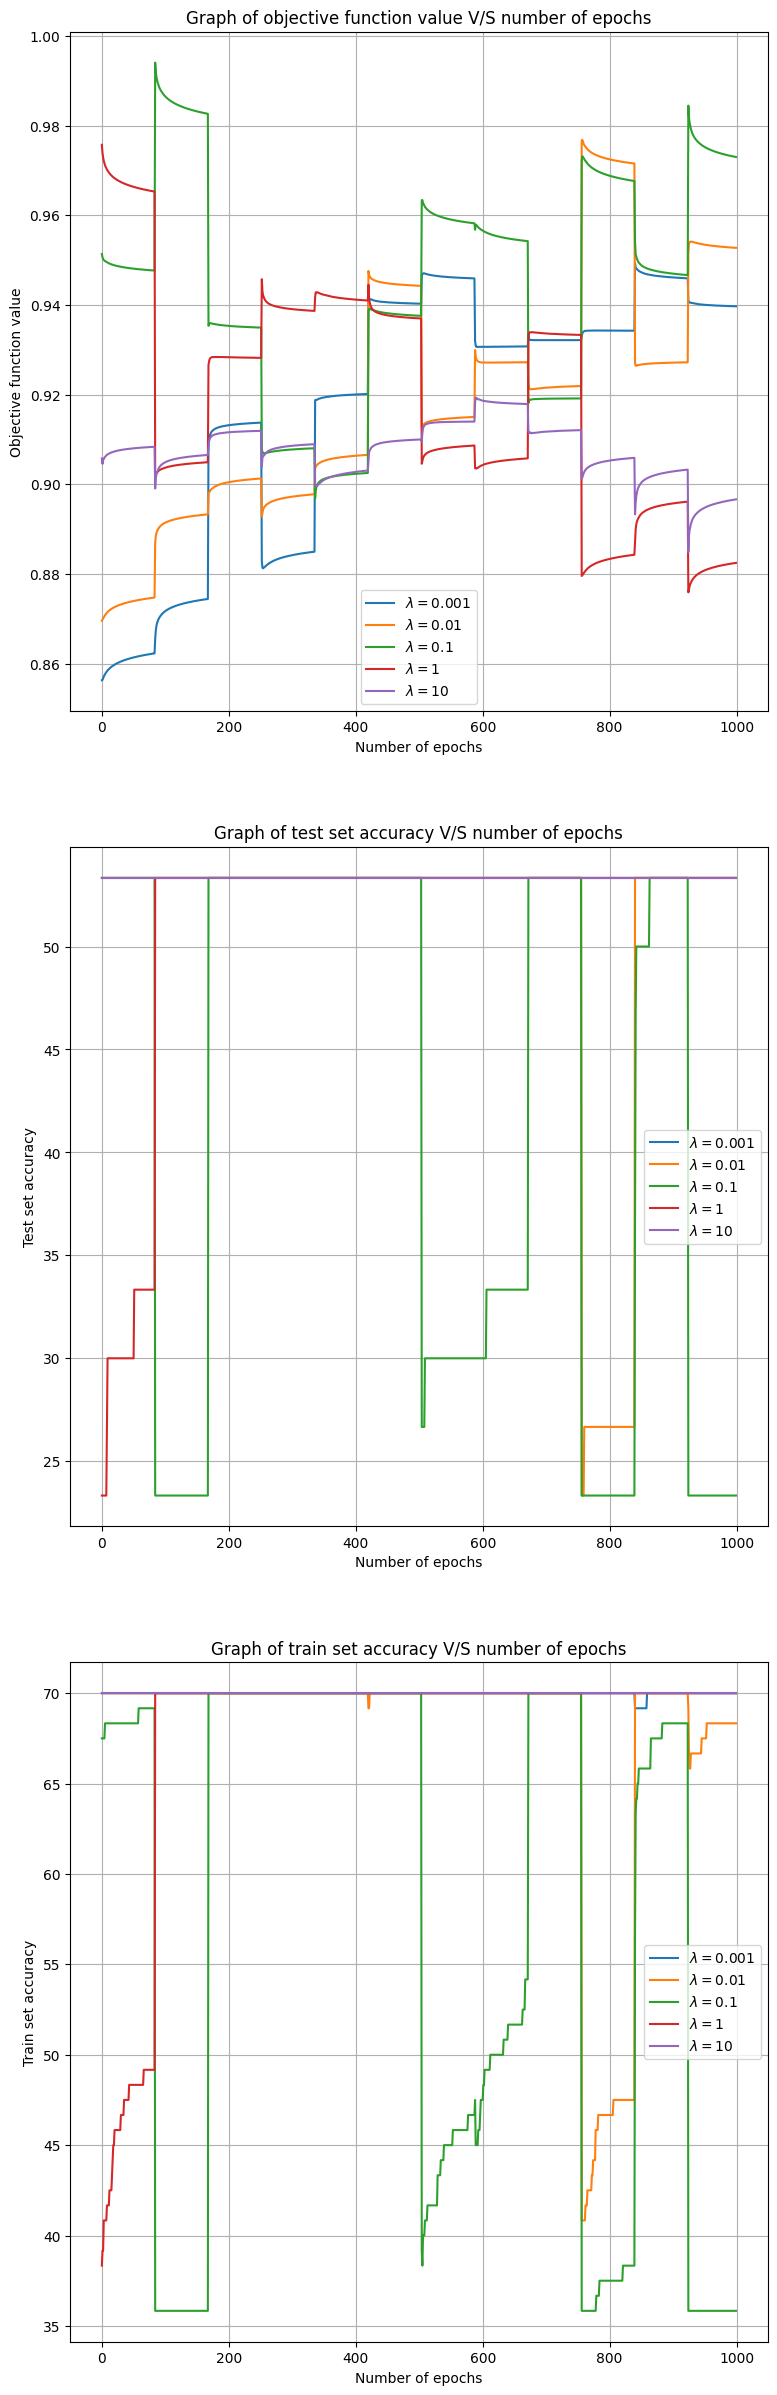

In [ ]:
number_of_epochs = 1000
lamda_list = [0.001, 0.01, 0.1, 1, 10]
fig, axs = plt.subplots(3, 1, figsize=(9, 30))
axs[0].set_title("Graph of objective function value V/S number of epochs")
axs[1].set_title("Graph of test set accuracy V/S number of epochs")
axs[2].set_title("Graph of train set accuracy V/S number of epochs")

for i, lamda in enumerate(lamda_list):
    result = OPT1_sh(train_data, train_label, lamda, number_of_epochs)
    axs[0].plot(result[1], label="$\lambda = {}$".format(lamda))
    axs[1].plot(result[2], label="$\lambda = {}$".format(lamda))
    axs[2].plot(result[3], label="$\lambda = {}$".format(lamda))

axs[0].legend()
axs[0].set_xlabel("Number of epochs")
axs[0].set_ylabel("Objective function value")
axs[0].grid()

axs[1].legend()
axs[1].set_xlabel("Number of epochs")
axs[1].set_ylabel("Test set accuracy")
axs[1].grid()

axs[2].legend()
axs[2].set_xlabel("Number of epochs")
axs[2].set_ylabel("Train set accuracy")
axs[2].grid()

plt.show()



In [ ]:
from tabulate import tabulate
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[lamda_list[i],OPT1_sh(train_data,train_label,lamda_list[i],number_of_epochs)[3][-1],OPT1_sh(train_data,train_label,lamda_list[i],number_of_epochs)[2][-1]] for i in range(len(lamda_list))]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            1     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|           10     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+


Squared hinge loss with modified function

In [ ]:
def OPT2_sh(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval= []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 100 or precision == False):
    if epoch > 100:
      a2 = list_of_train_acc[-1] - list_of_train_acc[-10]
      if max(a2, -a2) < 0.00001:
        precision = True
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i)))
      t=t+1
      if t>10000:
        t=1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_sh(data,label,w))
    epoch = epoch + 1
  return w, fval, list_of_test_acc, list_of_train_acc

In [ ]:
lamda_list = [0.001, 0.01, 0.1, 1, 10]
fig, axs = plt.subplots(3, 1, figsize=(9, 15))
axs[0].set_title("Graph of objective function value V/S number of epochs")
axs[1].set_title("Graph of test set accuracy V/S number of epochs")
axs[2].set_title("Graph of train set accuracy V/S number of epochs")

for i, lamda in enumerate(lamda_list):
    result = OPT2_sh(train_data, train_label, lamda)
    axs[0].plot(result[1], label="$\lambda = {}$".format(lamda))
    axs[1].plot(result[2], label="$\lambda = {}$".format(lamda))
    axs[2].plot(result[3], label="$\lambda = {}$".format(lamda))

axs[0].legend()
axs[0].set_xlabel("Number of epochs")
axs[0].set_ylabel("Objective function value")
axs[0].grid()

axs[1].legend()
axs[1].set_xlabel("Number of epochs")
axs[1].set_ylabel("Test set accuracy")
axs[1].grid()

axs[2].legend()
axs[2].set_xlabel("Number of epochs")
axs[2].set_ylabel("Train set accuracy")
axs[2].grid()

plt.show()


In [ ]:
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[lamda_list[i],OPT2_sh(train_data,train_label,lamda_list[i])[3][-1],OPT2_sh(train_data,train_label,lamda_list[i])[2][-1]] for i in range(len(lamda_list))]
print(tabulate(my_data, headers=head, tablefmt="grid"))


+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|            1     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+
|           10     |                  70 |         53.3333 |
+------------------+---------------------+-----------------+


From all figure test accuracy and train accuracy either increasing or staying same.for each value of lamda the training and testing accuracy are 70% and 53.33% respectively.